# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import numpy as np
from api_keys import weather_api_key

## Generate Cities List

In [2]:
latitudes = np.random.uniform(-90,90,1500)
longitudes = np.random.uniform(-180, 180, 1500)
cities =[]
coordinates = []
coordinates = zip(latitudes, longitudes)
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    city = citipy.nearest_city(lat, lon).city_name
    if city not in cities:
        cities.append(city)
print(len(cities))


587


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

city_data = []

print ("Beginning Data Retrieval")
print("----------------------------")

count=1
set=1
for City in cities:
    query_url = f"{url}appid={weather_api_key}&units={units}&q={City}"
    print(f"Processing Record {count} of Set {set} | {City}")
    weather = requests.get(query_url).json()
    if count==50:
            count = 1
            set = set+1
    else:
            count = count +1  
    try:
        temp = weather['main']['temp']
        humidity = weather['main']['humidity']
        cloudiness = weather['clouds']['all']
        wind = weather['wind']['speed']
        lat = weather['coord']['lat']
        lon = lat = weather['coord']['lon']
        name = weather['name']
        city_data.append({"City":name, "Latitude":lat,"Longitude":lon,"Temp (F)":temp, "Humidity (%)":humidity,"Cloudiness (%)":cloudiness, "Wind Speed (mph)":wind})
       
    except:
        print("City not found. Skipping...")
        pass

print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | khani
Processing Record 3 of Set 1 | grindavik
Processing Record 4 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 1 | grand gaube
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | kupang
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | tshane
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | nara
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | cookeville
Processing Record 17 of Set 1 | mozarlandia
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | paamiut
Processing Record 21 of Set 1 | ararat
Processing Record 22 of Set 1 | uchiza
Proce

Processing Record 38 of Set 4 | tarudant
City not found. Skipping...
Processing Record 39 of Set 4 | saleaula
City not found. Skipping...
Processing Record 40 of Set 4 | marsh harbour
Processing Record 41 of Set 4 | arraial do cabo
Processing Record 42 of Set 4 | hondo
Processing Record 43 of Set 4 | kuche
City not found. Skipping...
Processing Record 44 of Set 4 | henties bay
Processing Record 45 of Set 4 | diapaga
Processing Record 46 of Set 4 | cherskiy
Processing Record 47 of Set 4 | tasbuget
City not found. Skipping...
Processing Record 48 of Set 4 | spencer
Processing Record 49 of Set 4 | egvekinot
Processing Record 50 of Set 4 | magdalena
Processing Record 1 of Set 5 | sindor
Processing Record 2 of Set 5 | alghero
Processing Record 3 of Set 5 | cantaura
Processing Record 4 of Set 5 | qaanaaq
Processing Record 5 of Set 5 | san isidro
Processing Record 6 of Set 5 | umm lajj
Processing Record 7 of Set 5 | ilorin
Processing Record 8 of Set 5 | ust-karsk
Processing Record 9 of Set 5 

Processing Record 27 of Set 8 | praia da vitoria
Processing Record 28 of Set 8 | praya
Processing Record 29 of Set 8 | abeche
Processing Record 30 of Set 8 | mabaruma
Processing Record 31 of Set 8 | severodvinsk
Processing Record 32 of Set 8 | maykain
City not found. Skipping...
Processing Record 33 of Set 8 | bushenyi
Processing Record 34 of Set 8 | aykhal
Processing Record 35 of Set 8 | chapais
Processing Record 36 of Set 8 | ahuimanu
Processing Record 37 of Set 8 | camacha
Processing Record 38 of Set 8 | nelson bay
Processing Record 39 of Set 8 | maidstone
Processing Record 40 of Set 8 | sinyavskoye
Processing Record 41 of Set 8 | kang
Processing Record 42 of Set 8 | adrar
Processing Record 43 of Set 8 | creston
Processing Record 44 of Set 8 | yagodnoye
Processing Record 45 of Set 8 | fortuna
Processing Record 46 of Set 8 | sri aman
Processing Record 47 of Set 8 | boa vista
Processing Record 48 of Set 8 | estelle
Processing Record 49 of Set 8 | sandy bay
Processing Record 50 of Set 

Processing Record 16 of Set 12 | la plata
Processing Record 17 of Set 12 | boyarka
Processing Record 18 of Set 12 | medea
Processing Record 19 of Set 12 | alpena
Processing Record 20 of Set 12 | zhigansk
Processing Record 21 of Set 12 | fairview
Processing Record 22 of Set 12 | beibei
Processing Record 23 of Set 12 | calderitas
Processing Record 24 of Set 12 | turayf
Processing Record 25 of Set 12 | palmer
Processing Record 26 of Set 12 | la asuncion
Processing Record 27 of Set 12 | puerto el triunfo
Processing Record 28 of Set 12 | catuday
Processing Record 29 of Set 12 | ibra
Processing Record 30 of Set 12 | manicore
Processing Record 31 of Set 12 | richards bay
Processing Record 32 of Set 12 | charcas
Processing Record 33 of Set 12 | kysyl-syr
Processing Record 34 of Set 12 | sangar
Processing Record 35 of Set 12 | olafsvik
Processing Record 36 of Set 12 | alta floresta
Processing Record 37 of Set 12 | labytnangi
----------------------------
Data Retrieval Complete
-----------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = pd.DataFrame(city_data)
city_data.to_csv("Weather_City_Data.csv", encoding="utf-8", index=False, header=True)
city_data.head()

,City,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Busselton,115.33,115.33,69.17,64,100,10.92
1,Khani,42.96,42.96,53.60,93,0,5.82
2,Grindavik,-22.43,-22.43,41.00,93,75,19.46
3,Grand Gaube,57.66,57.66,73.00,48,0,11.99
4,Saint Paul Harbor,-152.41,-152.41,35.60,55,90,9.17


In [6]:
city_data.describe()

,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,17.974655,17.974655,57.194655,73.586592,51.402235,7.878585
std,91.777924,91.777924,22.844181,20.985079,40.480858,5.746729
min,-179.170000,-179.170000,-10.070000,11.000000,0.000000,0.160000
25%,-63.000000,-63.000000,42.800000,63.000000,1.000000,3.360000
50%,21.870000,21.870000,62.290000,80.000000,63.000000,6.170000
75%,100.950000,100.950000,76.410000,90.000000,90.000000,10.890000
max,179.320000,179.320000,95.000000,100.000000,100.000000,38.450000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Check for cities with Humidity greater than 100
Humid = city_data.loc[(city_data['Humidity (%)']>100)]
Humid

,City,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [12]:
#  Get the indices of cities that have humidity over 100%.
humid100 = city_data[(city_data['Humidity (%)']>100)].index

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(humid100, inplace=False)

In [14]:
# Display Clean DataFrame
clean_city_data.head()
print(len(clean_city_data))

537


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

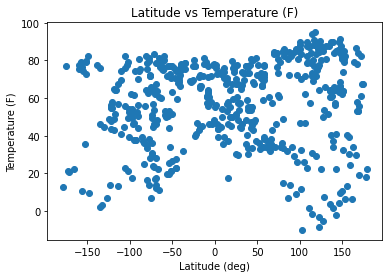

In [15]:
Lats = clean_city_data["Latitude"] 
Temp = clean_city_data["Temp (F)"]
plt.scatter(Lats, Temp)
plt.title("Latitude vs Temperature (F)")
plt.xlabel("Latitude (deg)")
plt.ylabel("Temperature (F)")
plt.savefig("Plots/Temp_v_Latitude")
plt.show()

## Latitude vs. Humidity Plot

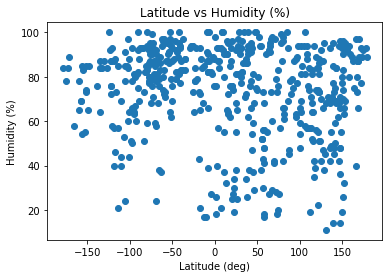

In [16]:
humidity = clean_city_data["Humidity (%)"]
plt.scatter(Lats, humidity)
plt.title("Latitude vs Humidity (%)")
plt.xlabel("Latitude (deg)")
plt.ylabel("Humidity (%)")
plt.savefig("Plots/Humidity_v_Latitude")
plt.show()

## Latitude vs. Cloudiness Plot

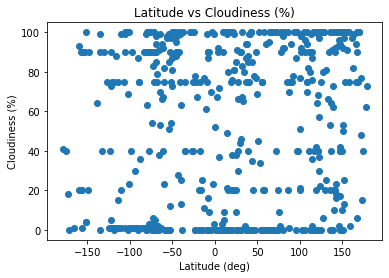

In [17]:
clouds = clean_city_data["Cloudiness (%)"]
plt.scatter(Lats, clouds)
plt.title("Latitude vs Cloudiness (%)")
plt.xlabel("Latitude (deg)")
plt.ylabel("Cloudiness (%)")
plt.savefig("Plots/Cloudiness_v_Latitude")
plt.show()

## Latitude vs. Wind Speed Plot

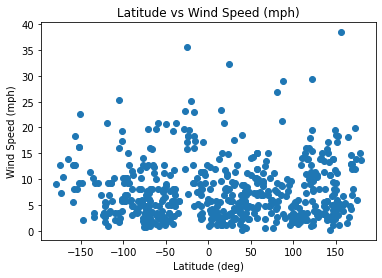

In [18]:
windy = clean_city_data["Wind Speed (mph)"]
plt.scatter(Lats, windy)
plt.title("Latitude vs Wind Speed (mph)")
plt.xlabel("Latitude (deg)")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Plots/WindSpeed_v_Latitude")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression